In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=062493a200e763cdb8a9d4450e8670e4ad4e0df35ea87c50da915a29c582fcd1
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
import nltk
import math
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
os.chdir("/content/drive/My Drive/IRProject")

In [6]:
# Read the csv file
df = pd.read_csv('covid_df_20000.csv')
df

,Unnamed: 0,doc_id,title,abstract,text_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...,...
19995,19996,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...
19996,19997,b37bf3ab1d814f853a42cd8958d7390b42343bd2,NaN,NaN,To the Editor:\n We read with interest the art...
19997,19998,2c70b8caf708c5c1b0c9b811a80179061274cff7,Nervensystem,NaN,zeichen diagnostisch eine Rolle spielen. Am Ko...
19998,19999,1831d9c801bcbc3388eb2aeb7d48aed3c2c690e9,Journal Pre-proof The sub-specialty of Foot an...,NaN,The sub-specialty of Foot and Ankle is evolvin...


In [7]:
# Drop the first column of the dataframe
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...
19996,b37bf3ab1d814f853a42cd8958d7390b42343bd2,NaN,NaN,To the Editor:\n We read with interest the art...
19997,2c70b8caf708c5c1b0c9b811a80179061274cff7,Nervensystem,NaN,zeichen diagnostisch eine Rolle spielen. Am Ko...
19998,1831d9c801bcbc3388eb2aeb7d48aed3c2c690e9,Journal Pre-proof The sub-specialty of Foot an...,NaN,The sub-specialty of Foot and Ankle is evolvin...


In [8]:
# Drop rows with NaN values in the 'text_body' column and 'abstract' columns
df = df.dropna(subset=['text_body', 'abstract'])
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...


In [9]:
# Replace cells with NaN values in the 'title' column with ''. We maintain these rows as documents' contents are a priority.
print("The number of NaNs in the title column is: ",  df['title'].isna().sum())
df['title'] = df['title'].fillna('')
df

The number of NaNs in the title column is:  687


<ipython-input-9-78e3d4fb7465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].fillna('')


,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...


In [10]:
# Function to detect the language of the text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Remove non-English rows
df['language'] = df['text_body'].apply(detect_language)
df = df[df['language'] == 'en']
df

<ipython-input-10-b063df0b0133>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['text_body'].apply(detect_language)


,doc_id,title,abstract,text_body,language
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en
...,...,...,...,...,...
19990,1f0587d0bf239fead9cf242b73ed0a2f2b753874,"Germaphobia! Does our Relationship with, and K...",Germaphobia --a pathological aversion to micro...,Germaphobia -also known as 'mysophobia' -is th...,en
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...,en
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...,en
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...,en


In [11]:
# Define a function for preprocessing text
def preprocess(text):

    # Tokenize the text into words and convert to lowercase
    word_tokens = nltk.word_tokenize(text.lower())

    # Remove punctuation
    word_tokens_punct = [word for word in word_tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    removing_stopwords = [word for word in word_tokens_punct if word not in stop_words]

    # Apply stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(word) for word in removing_stopwords]

    return stemmed_tokens

    

In [25]:
# Tokenize the title and text_body columns of the DataFrame
tokenized_corpus = []
for index, row in df.iterrows():
    # Tokenize the title column if it is a string, otherwise use an empty list
    if type(row['title']) == str:
        title_tokens = preprocess(row['title'])
    else:
        title_tokens = []

    # Tokenize the abstract column if it is a string, otherwise use an empty list
    if type(row['text_body']) == str:
        text_body_tokens = preprocess(row['text_body'])
    else:
        text_body_tokens = []

    # Combine the title and abstract tokens into a single document
    tokenized_corpus.append(title_tokens + text_body_tokens)

In [12]:
tokenized_corpus[:2]

[['long',
  'term',
  'predictor',
  'breathless',
  'exercis',
  'intoler',
  'chronic',
  'fatigu',
  'hospit',
  'patient',
  'cohort',
  'studi',
  'month',
  'median',
  'million',
  'coronavirus',
  'diseas',
  'diagnos',
  'around',
  'world',
  'mani',
  'requir',
  'hospit',
  'care',
  'past',
  'month',
  'enhanc',
  'emphasi',
  'gradual',
  'move',
  'care',
  'survivor',
  'base',
  'recent',
  'data',
  'million',
  'patient',
  'recov',
  'acut',
  'experienc',
  'linger',
  'symptom',
  'lead',
  'disabl',
  'impair',
  'daili',
  'life',
  'activ',
  'various',
  'term',
  'use',
  'describ',
  'condit',
  'patient',
  'fail',
  'return',
  'baselin',
  'health',
  'state',
  'includ',
  'sequela',
  'covid',
  'syndrom',
  'pac',
  'long',
  'covid',
  'articl',
  'use',
  'term',
  'pac',
  'henceforth',
  'preval',
  'various',
  'pac',
  'symptom',
  'examin',
  'systemat',
  'review',
  'studi',
  'publish',
  'till',
  'march',
  'acut',
  'phase',
  'week',
  '

In [13]:
# Define a function for computing the inverse document frequency of a term
def idf(token, tokenized_corpus):
    N = len(tokenized_corpus)
    n_q = sum(1 for doc in tokenized_corpus if token in doc)
    return math.log((N - n_q + 0.5) / (n_q + 0.5))

In [14]:
# Define a function for computing the BM25 score between a query and a document
def bm25(query_tokens, doc_tokens, tokenized_corpus, k1=1.5, b=0.75):
    doc_len = len(doc_tokens)
    avg_doc_len = sum(len(doc) for doc in tokenized_corpus) / len(tokenized_corpus)
    score = 0

    for token in query_tokens:
        # Skip the token if it is not present in the document
        if token not in doc_tokens:
            continue

        f_q = doc_tokens.count(token)
        term_idf = idf(token, tokenized_corpus)
        numerator = f_q * (k1 + 1)
        denominator = f_q + k1 * (1 - b + b * (doc_len / avg_doc_len))
        score += term_idf * (numerator / denominator)

    return score

In [15]:
# Define a function for searching the DataFrame using a query string
def search(query, tokenized_corpus, top_n=10):
    # Preprocess the query string into tokens
    query_tokens = preprocess(query)

    # Compute the BM25 scores between the query and each document in the corpus
    scores = [bm25(query_tokens, doc_tokens, tokenized_corpus) for doc_tokens in tokenized_corpus]

    # Get the indices of the top n scores in descending order
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:top_n]

    # Get the BM25 scores of the top n documents
    top_scores = [scores[i] for i in top_indices]

    # Return the DataFrame rows and scores corresponding to the top n scores
    return df.iloc[top_indices], top_scores

In [16]:
tokenized_corpus[0]

['long',
 'term',
 'predictor',
 'breathless',
 'exercis',
 'intoler',
 'chronic',
 'fatigu',
 'hospit',
 'patient',
 'cohort',
 'studi',
 'month',
 'median',
 'million',
 'coronavirus',
 'diseas',
 'diagnos',
 'around',
 'world',
 'mani',
 'requir',
 'hospit',
 'care',
 'past',
 'month',
 'enhanc',
 'emphasi',
 'gradual',
 'move',
 'care',
 'survivor',
 'base',
 'recent',
 'data',
 'million',
 'patient',
 'recov',
 'acut',
 'experienc',
 'linger',
 'symptom',
 'lead',
 'disabl',
 'impair',
 'daili',
 'life',
 'activ',
 'various',
 'term',
 'use',
 'describ',
 'condit',
 'patient',
 'fail',
 'return',
 'baselin',
 'health',
 'state',
 'includ',
 'sequela',
 'covid',
 'syndrom',
 'pac',
 'long',
 'covid',
 'articl',
 'use',
 'term',
 'pac',
 'henceforth',
 'preval',
 'various',
 'pac',
 'symptom',
 'examin',
 'systemat',
 'review',
 'studi',
 'publish',
 'till',
 'march',
 'acut',
 'phase',
 'week',
 'frequent',
 'report',
 'symptom',
 'fatigu',
 'ci',
 'dyspnea',
 'ci',
 'anxieti',
 'c

**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community
Top 10 results for the query 'transmission of virus in community':

Title: Asymptomatic SARS-CoV-2 Transmission from Community Contacts in Healthcare Workers
Body Text: Without a vaccine or antiviral therapy for the newly recognized COVID-19 pandemic, social distancing may be the only current means to effectively slow the spread of the novel coronavirus SARS-CoV-2. Most states have enacted shelter in place orders to reduce an individual's risk of infection. But, social distancing is not an option for many, including the millions of healthcare workers still providing important and necessary healthcare. According to a recent survey conducted by the Physicians Foundation, doctors in general see an average of 20 patients per day outside of the current epidemic in addition to interactions with their healthcare team. 1 Healthcare providers rely on the use of personal protective equipment (PPE) to reduce the risk of infections from t

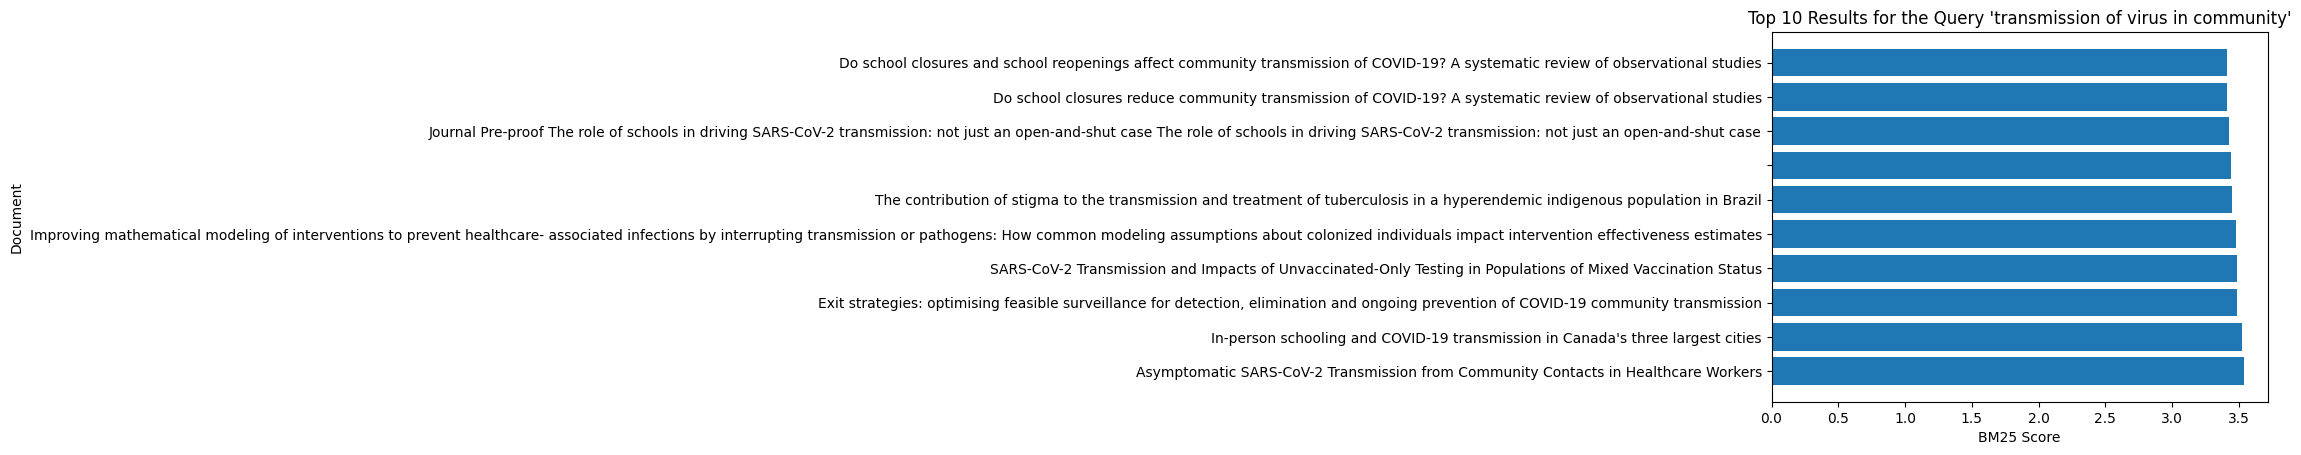

In [17]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period
Top 10 results for the query 'range of incubation period':

Title: Citation: Heat Shock Protein Member 8 Is an Attachment Factor for Infectious Bronchitis Virus
Body Text: Coronaviridae, causing serious economic losses to the poultry industry (Cavanagh, 2007) . IBV has many genotypes and serotypes circulating in poultry farms leading to continuous outbreaks of infectious bronchitis (IB) disease (Bijlenga et al., 2004) . IBV is an enveloped virus with a single stranded unsegmented positive sense RNA genome of about 27 kb size. The IBV virion is made up of spike protein (S), membrane protein (M), nucleoprotein (N), envelope protein (E), and genomic RNA (Lai and Cavanagh, 1997) . Spike protein determines the IBV tropism and can be cleaved into the two subunits: S1 and S2 by host furin protein (Cavanagh et al., 1992; Casais et al., 2003) . The S1 subunit is responsible for binding to the cell surface receptor, while S2 is responsible for 

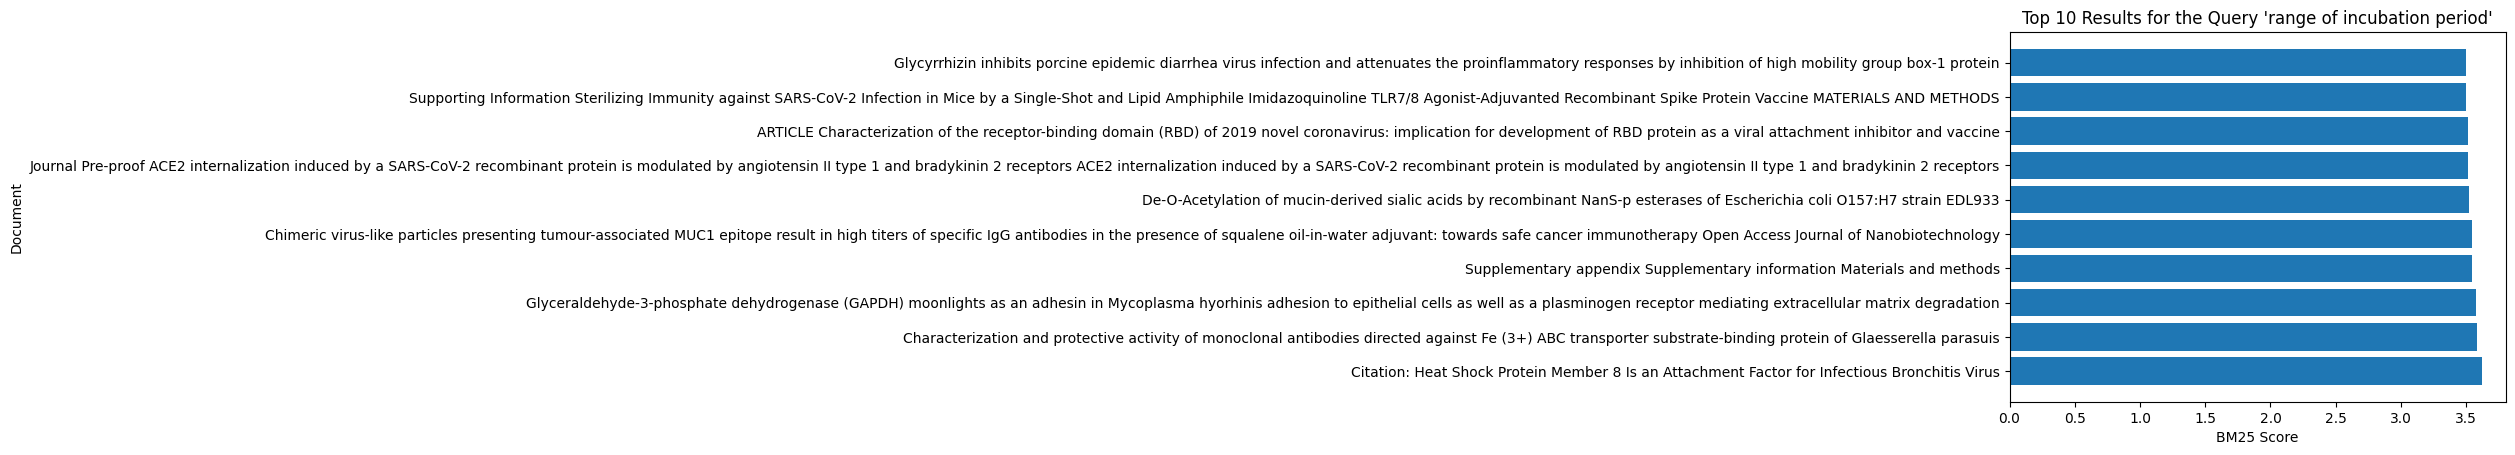

In [18]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks
Top 10 results for the query 'seasonal outbreaks':

Title: 1 Inference and forecast of H7N9 influenza in China
Body Text: Wild birds, particularly Anseriformes and Charadriformes, are thought to be the principal natural reservoir of low pathogenic avian influenza (LPAI) viruses [1, 2] , as well as the source of influenza A viruses infecting all other animals [3] . Indeed, LPAI includes nearly all influenza subtypes, and wild bird migration can bring viruses to new areas and species [1, 4] . The LPAI A(H7N9) virus was first identified in humans in China in early 2013 [5] . As at 15 October 2015, 678 confirmed human infections have been documented, with a case fatality rate of ca 40% [6] . The virus most probably originated in wild bird populations [7, 8] , was introduced into domestic ducks and chickens and has since become well established in poultry populations in south-eastern China [6] . Transmission to humans occurs primarily at live bird

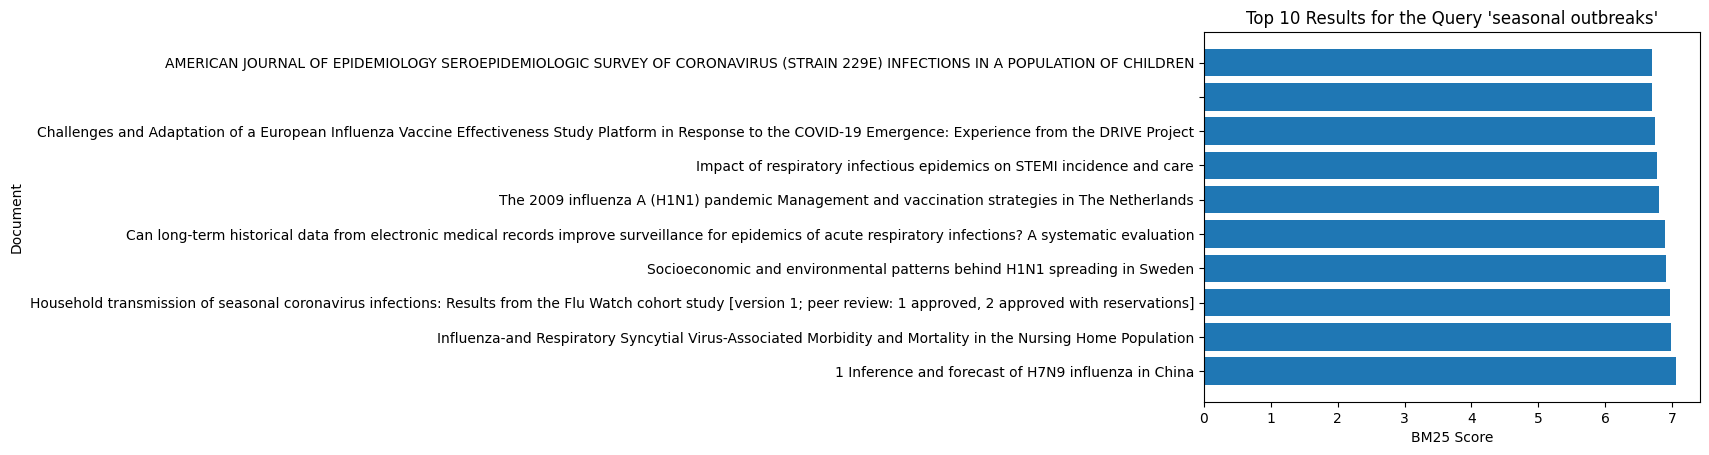

In [19]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus
Top 10 results for the query 'effect of environment factors on virus':

Title: Scientific production and thematic breakthroughs in smart learning environments: a bibliometric analysis
Body Text: The evolution of learning and teaching methods from the traditional classroom learning environment to a technology-enhanced learning environment positively impacts education (Cárdenas-Robledo & Peña-Ayal, 2018; McIntosh, Herman, Sanford, McGraw, & Florence, 2004) . This transition is even more relevant nowadays due to unforeseen circumstances that create an emergency on the world's education, for example, where formal learning is not possible due to closure of schools as experienced in the recent COVID-19 pandemic (Atchison et al., 2020) . As a result of this pandemic and to prevent the spread of the disease, many countries adopted online distance learning as an alternative teaching model (Reimers & Schleicher, 2020) . This situati

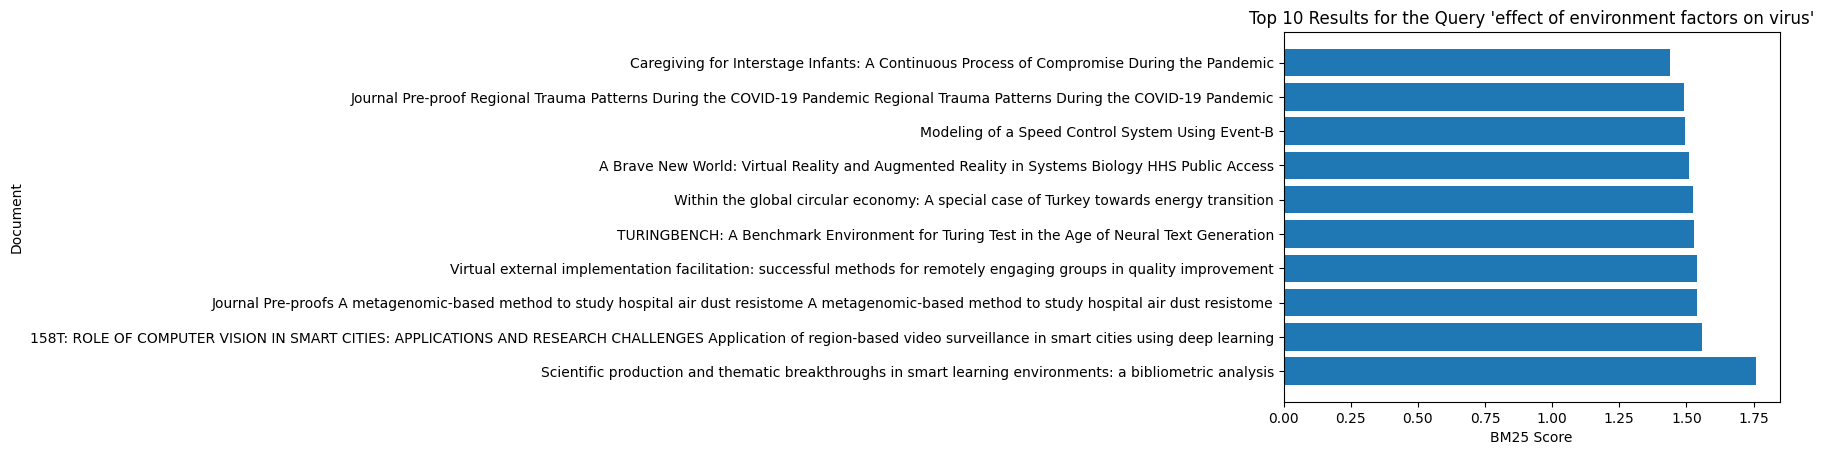

In [20]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces
Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Title: Inanimate surfaces as potential source of 2019-nCoV spread and their disinfection with biocidal agents
Body Text: Earliest case of novel coronavirus 2019-nCoV detected on 17 November 2019 from Wuhan China, has killed over 25,000 people and infected more than 500,000 globally as of March 28, 2020 (WHO, 2020). It has been spread to at least 202 countries and territories [1] . United States is now on the top with 107,463 confirmed cases followed by Italy and Spain as of March 28, 2020 (www.covidvisualizer.com). Research has explained person to person transmission both in hospital and family settings [2] . Some reports have described by local news channels and WHO. In Italy, at least 2,629 health workers have been infected by coronavirus since the onset of the outbreak in February 2020, representing 8.3 percent of total c

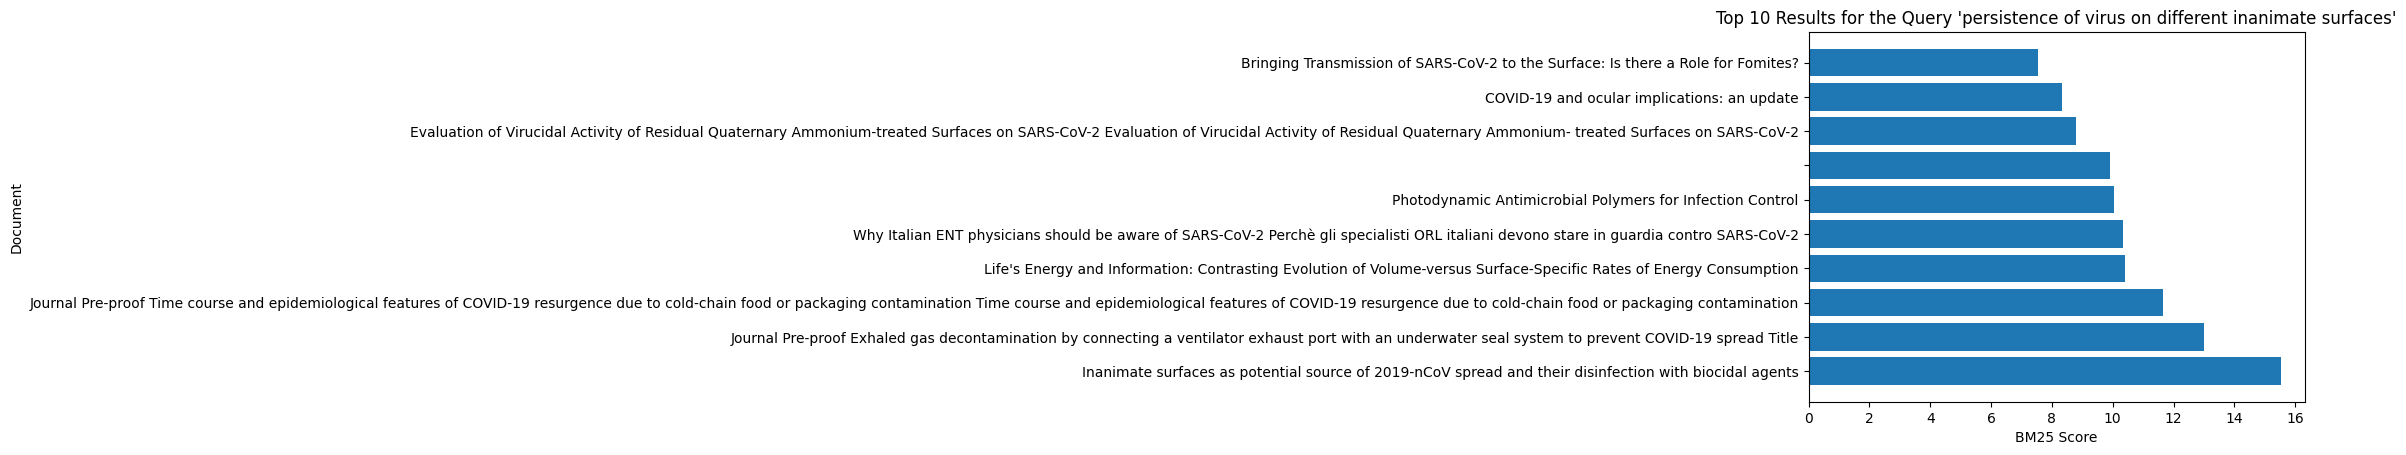

In [26]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

# Let us repeat the same steps for the 'abstract' column instead of the 'text_body, i.e. search through the documents' abstracts and not body texts. We then will observe which embeddings yield higher similarity scores for the queries.

In [16]:
# Tokenize the title and abstract columns of the DataFrame
tokenized_corpus = []
for index, row in df.iterrows():
    # Tokenize the title column if it is a string, otherwise use an empty list
    if type(row['title']) == str:
        title_tokens = preprocess(row['title'])
    else:
        title_tokens = []

    # Tokenize the abstract column if it is a string, otherwise use an empty list
    if type(row['abstract']) == str:
        abstract_tokens = preprocess(row['abstract'])
    else:
        abstract_tokens = []

    # Combine the title and abstract tokens into a single document
    tokenized_corpus.append(title_tokens + abstract_tokens)

In [17]:
tokenized_corpus[:2]

[['long',
  'term',
  'predictor',
  'breathless',
  'exercis',
  'intoler',
  'chronic',
  'fatigu',
  'hospit',
  'patient',
  'cohort',
  'studi',
  'month',
  'median',
  'j',
  'u',
  'r',
  'n',
  'l',
  'p',
  'r',
  'e',
  'r',
  'f'],
 ['emerg',
  'univers',
  'transmiss',
  'dynam',
  'complex',
  'involv',
  'model',
  'transmiss',
  'dynam',
  'roadblock',
  'achiev',
  'predict',
  'spread',
  'contain',
  'diseas',
  'addit',
  'understand',
  'mode',
  'transmiss',
  'effect',
  'mitig',
  'method',
  'also',
  'need',
  'built',
  'effect',
  'model',
  'make',
  'predict',
  'show',
  'complex',
  'circumv',
  'appeal',
  'scale',
  'principl',
  'lead',
  'emerg',
  'univers',
  'transmiss',
  'dynam',
  'diseas',
  'ensu',
  'data',
  'collaps',
  'render',
  'transmiss',
  'dynam',
  'larg',
  'independ',
  'geopolit',
  'variat',
  'effect',
  'various',
  'mitig',
  'strategi',
  'popul',
  'demograph',
  'etc',
  'propos',
  'simpl',
  'blue',
  'sky',
  'show',


**Query 1: 'transmission of virus in community'**

Top 10 results for the query 'transmission of virus in community':

Title: 
Abstract: The most important characteristics of coronavirus disease 2019 transmission that makes it difficult to control are 1) asymptomatic and presymptomatic transmission, 2) low incidence or lack of dominant systemic symptoms such as fever, 3) airborne transmission that may need a high infectious dose, and 4) super-spread events (SSEs). Patients with COVID-19 have high viral loads at symptom onset or even a few days prior to symptom onset, and most patients with COVID-19 have only mild respiratory symptoms or merely pauci-/null-symptoms. These characteristics of the virus enable it to easily spread to the community because most patients are unaware of their potential infectivity, and symptombased control measures cannot prevent this type of transmission. Furthermore, severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is also capable of airborne transmission in conditions such as aerosol-generating 

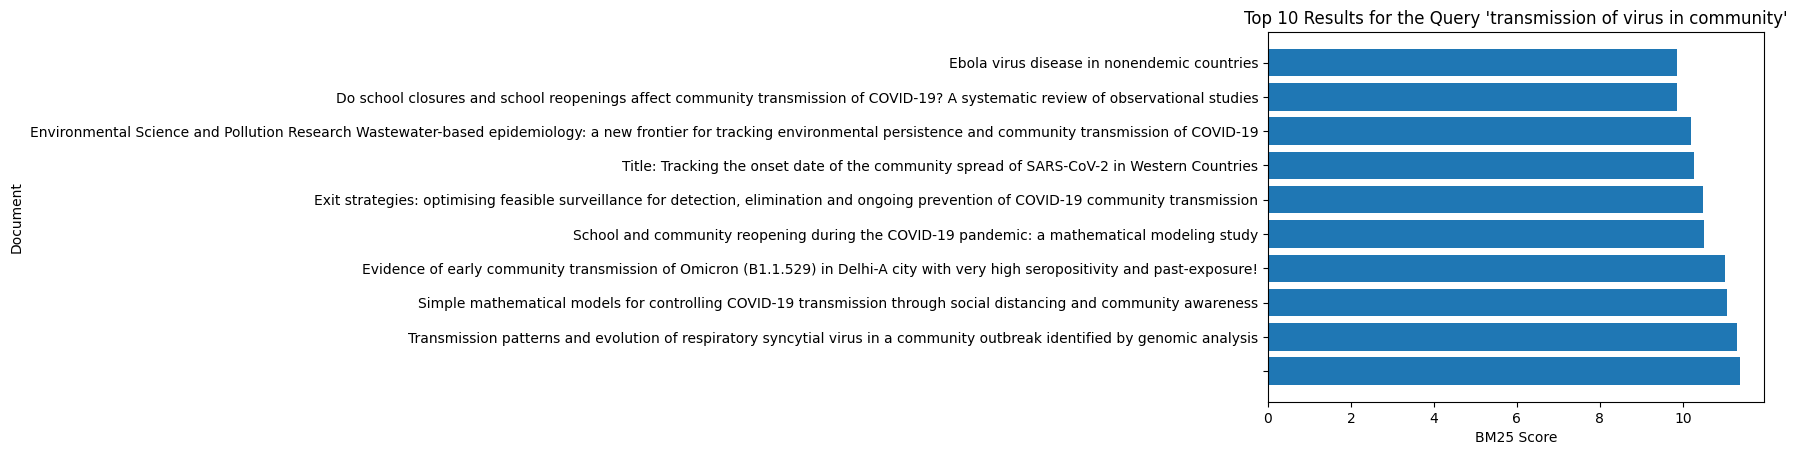

In [18]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period
Top 10 results for the query 'range of incubation period':

Title: Transmission of corona virus disease 2019 during the incubation period may lead to a quarantine loophole
Abstract: The ongoing outbreak of novel corona virus disease 2019 in Wuhan, China, is arousing international concern. This study evaluated whether and when the infected but asymptomatic cases during the incubation period could infect others.
 We collected data on demographic characteristics, exposure history, and symptom onset day of the confirmed cases, which had been announced by the Chinese local authorities. We evaluated the potential of transmission during the incubation period in 50 infection clusters, including 124 cases. All the secondary cases had a history of contact with their first-generation cases prior to symptom onset.
 The estimated mean incubation period for COVID-19 was 4.9 days (95% confidence interval [CI], 4.4 to 5.4) days, ranging from 0.8 to 1

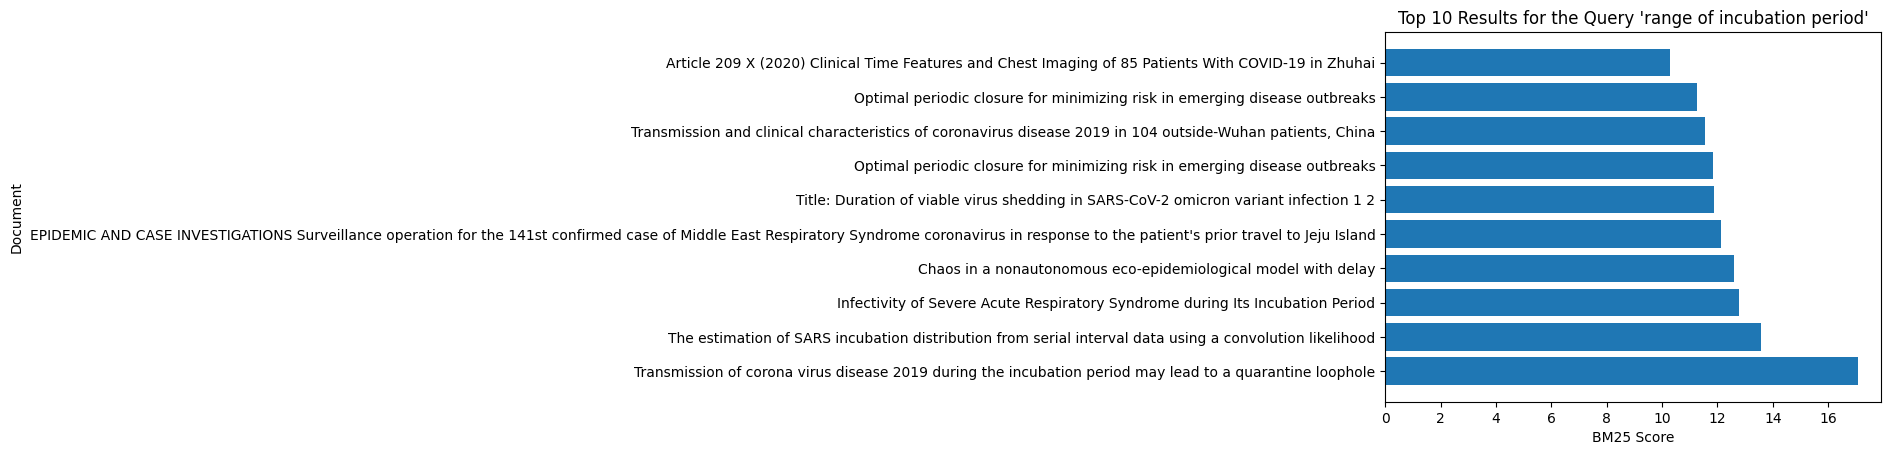

In [21]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks
Top 10 results for the query 'seasonal outbreaks':

Title: Risk of First-Episode Schizophrenia in Aged Adults Increased During COVID-19 Outbreak
Abstract: We noticed an unusual increase of aged adults in first-episode schizophrenia in January and February 2020 since the outbreak of COVID-19. This retrospective study aims to statistically validate this observation and find potential risk factors, if applicable. The demographics of schizophrenia in outpatients (both first-episode and follow-up) from January to March 2020 (36,624 records) and similar periods of 2017-2019 (114,141 records) were analyzed and compared to minimize seasonal influence. Limited personal information (age, gender, approximate residence) was investigated to find risk factors. After considering seasonal factors such as the Spring festival,
Score: 11.58365149963995

Title: Title: Delayed Start of the Respiratory Syncytial Virus Epidemic at the End of the 20/21 Northern Hemi

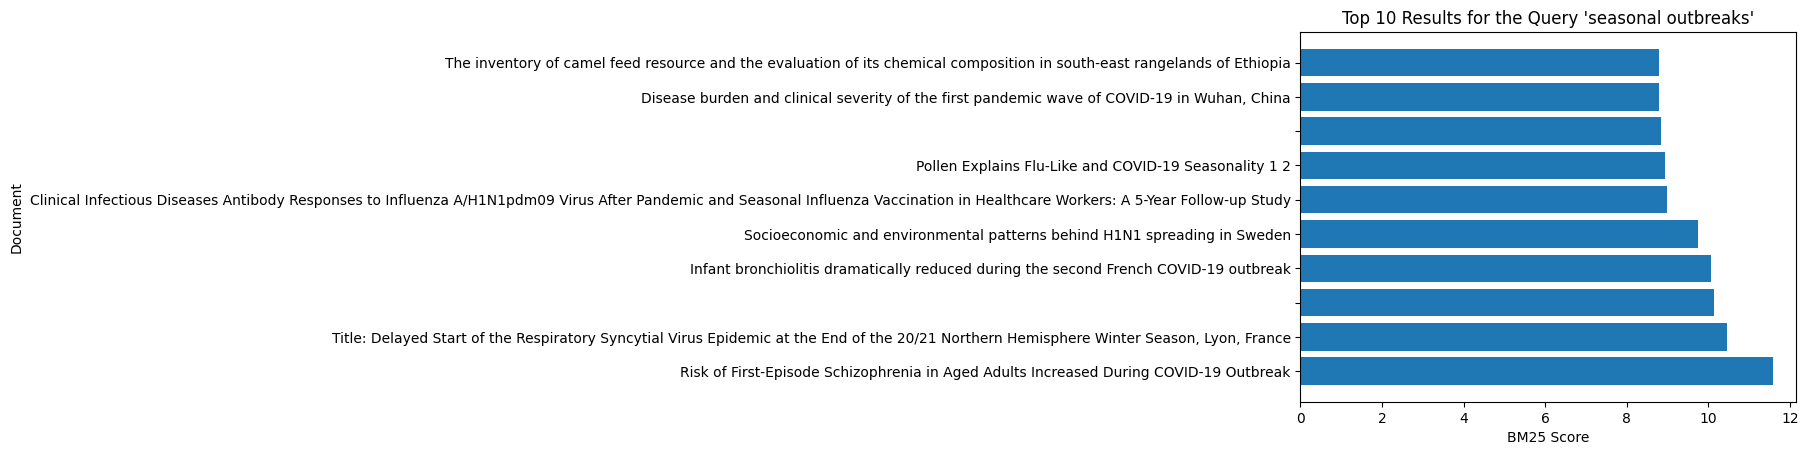

In [22]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus
Top 10 results for the query 'effect of environment factors on virus':

Title: Ruminal Phages -A Review
Abstract: The rumen ecosystem is a complex and dynamic environment, which hosts microorganisms including archaea, bacteria, protozoa, fungi, and viruses. These microorganisms interact with each other, altering the ruminal environment and substrates that will be available for the host digestion and metabolism. Viruses can infect the host and other microorganisms, which can drive changes in microorganisms' lysis rate, substrate availability, nutrient recycling, and population structure. The lysis of ruminal microorganisms' cells by viruses can release enzymes that enhance feedstuff fermentation, which may increase dietary nutrient utilization and feed efficiency. However, negative effects associated to viruses in the gastrointestinal tract have also been reported, in some cases, disrupting the dynamic stability of the rumi

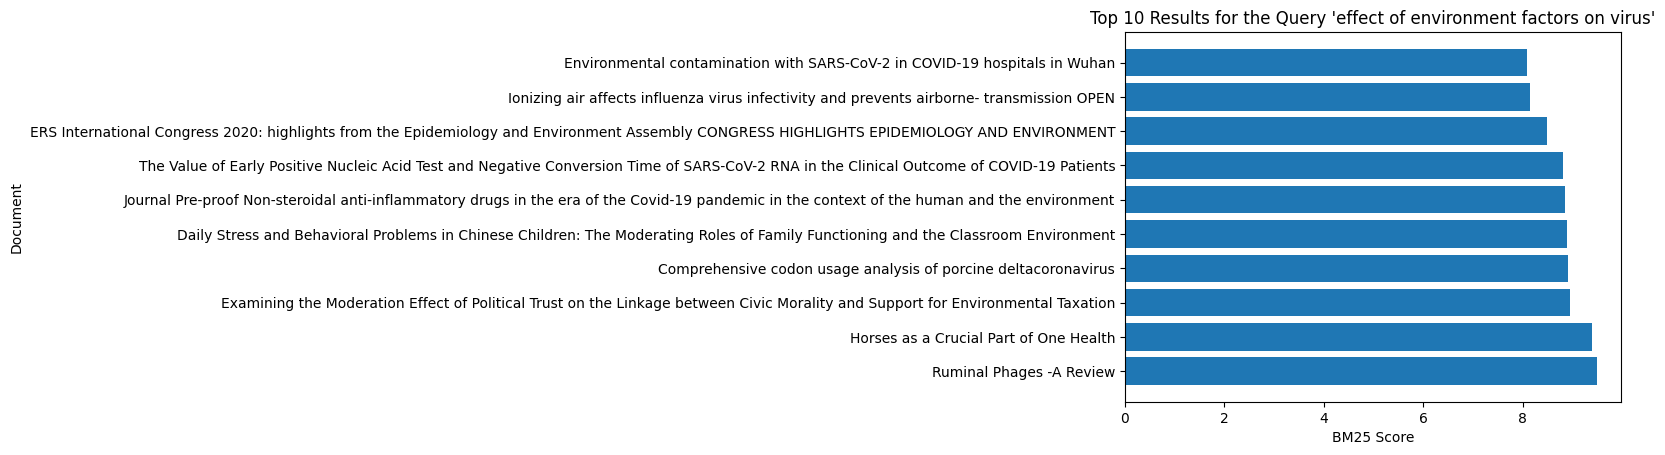

In [23]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces
Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Title: Inanimate surfaces as potential source of 2019-nCoV spread and their disinfection with biocidal agents
Abstract: The WHO has declared COVID-19 illness a global health concern which is caused by 2019-nCoV, causing severe respiratory tract infections in humans. Transmissibility among individual to individual have been reported through droplets and probably also via contaminated surfaces and hands. Human coronaviruses can persist on inanimate surfaces such as plastic, glass, fibers and metals up to nine days. 2019-nCoV remains infectious in air for 3 h and on inanimate surfaces such as cardboard, copper, plastic and steel up to 24, 4, 72 and 48 h respectively. Disinfectant activity of various biocidal agents against coronaviruses like ethanol (62-71%), sodium hypochlorite (0.1%) and hydrogen peroxide (0.5%) can be regard

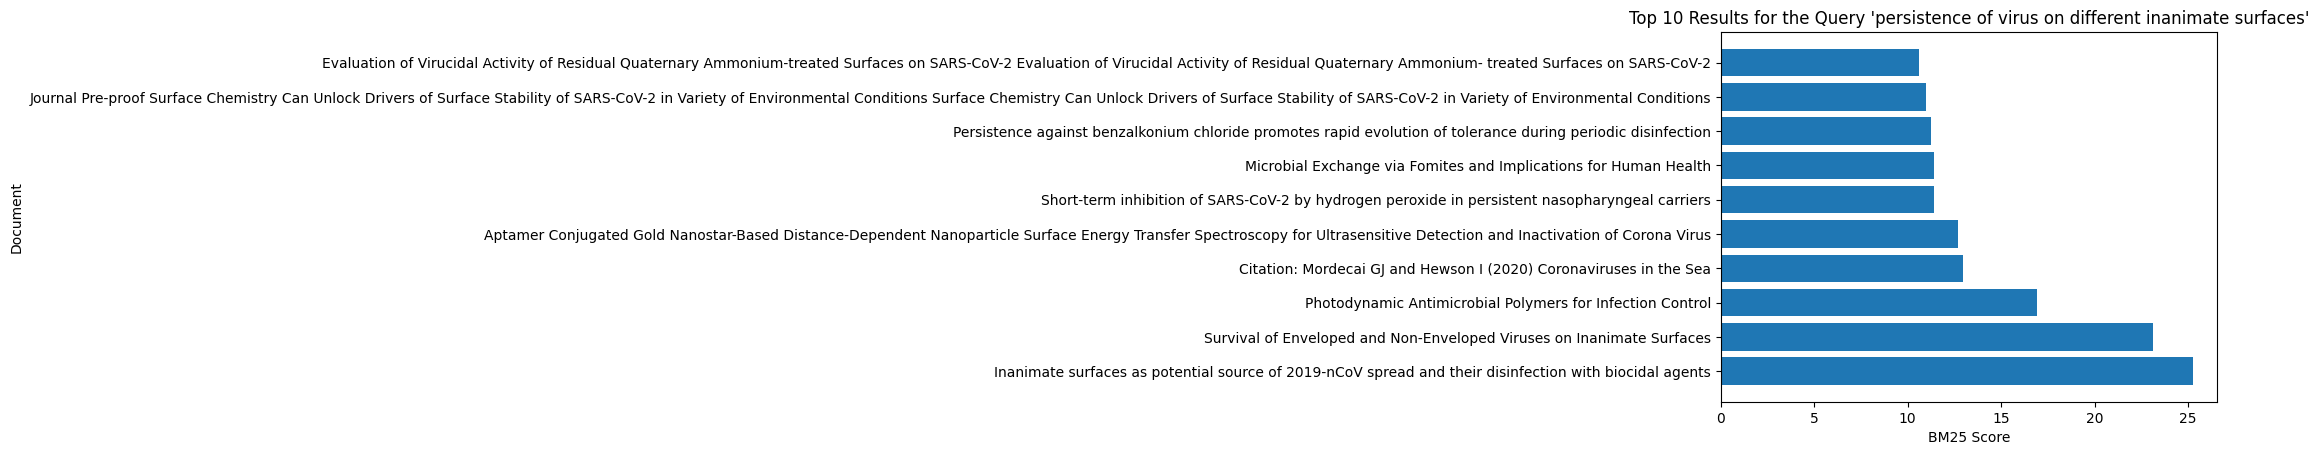

In [24]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()